# 10주차(0518)과제
- mag 데이터 활용 관계 분석
- 통계치 분석 및 시각화. 주석 달 것
- 두개 이상 비교 분석

In [ ]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## mpg의 컬럼 설명



1. mpg: miles per gallon. 연비
2. cylinders: 엔진의 실린더개수
3. displacement: 배기량 ( 단위가 큐빅인치)
4. horsepower: 마력
5. weight: 차 무게. 파운드 단위
6. accelearation: 0~60마일(100km)달성까지 걸리는 시간 (초) . 작을 수록 더 빠른 가속
7. mode_year: 자동차 모델의 연도
8. origin : 자동차 제조국 (1 = 미국 2= 유럽 3= 일본)
9. name : 자동차 이름 (제조사 + 모델명)

## 데이터 세트 구조 간단히 확인해보기

In [ ]:
mpg = sns.load_dataset('mpg')
# mpg 데이터 파악하기
print(mpg.describe())
print("")
print("########### mpg info ###########" * 3)
print()
print(mpg.info())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  

########### mpg info ###################### 

In [ ]:
#결측치 확인 : 마력에 6개의 결측치 확인
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# 결측치에 대해 평균으로 채워주기
mpg['horsepower'].fillna(mpg['horsepower'].median(), inplace = True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# 자료 분류 개수 카운트로 확인
print(mpg['cylinders'].value_counts())
print(mpg['origin'].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


[122 170  66  27  13]
[ 46.   82.8 119.6 156.4 193.2 230. ]


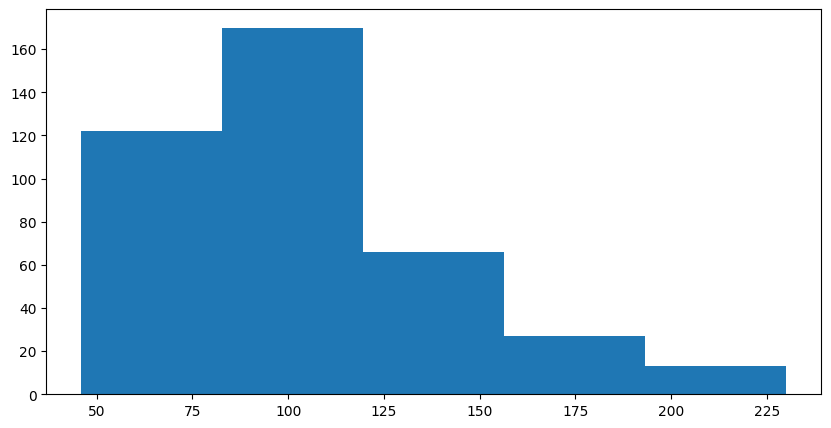

In [ ]:
# 연속형자료 (마력) 히스토그램
hp_freq = mpg['horsepower'].value_counts().sort_index()
hp_hist, hp_bins = np.histogram(mpg['horsepower'], bins = 5)
print(hp_hist)
print(hp_bins)
plt.figure(figsize = (10, 5))
plt.hist(mpg['horsepower'], bins = hp_bins)
# 마력의 분포가 정규분포가 아니다...
plt.show()

[121 113  77  63  24]
[1613.  2318.4 3023.8 3729.2 4434.6 5140. ]


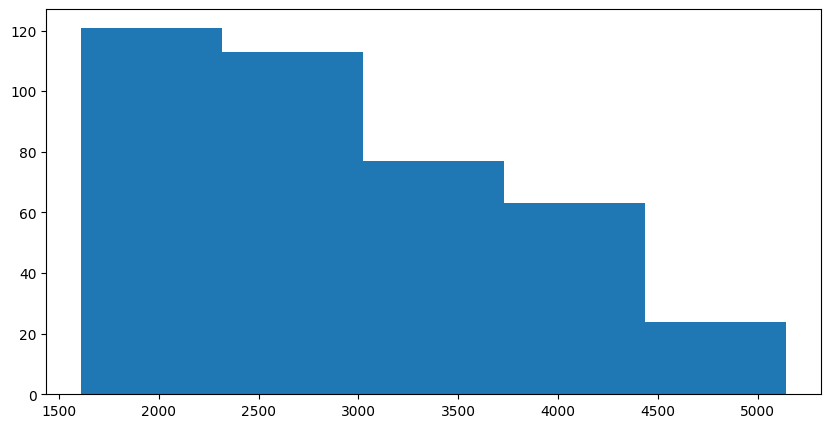

In [ ]:
# 연속형자료 (무게) 히스토그램
hp_freq = mpg['weight'].value_counts().sort_index()
hp_hist, hp_bins = np.histogram(mpg['weight'], bins = 5)
print(hp_hist)
print(hp_bins)
plt.figure(figsize = (10, 5))
plt.hist(mpg['weight'], bins = hp_bins)
# 마력의 분포가 정규분포가 아니다...
plt.show()

## numpy로 통계화

In [ ]:
# 마력에 대한 통계치
var = mpg['horsepower'].var()
std = mpg['horsepower'].std()
mean = mpg['horsepower'].mean()
range_val =  np.max(mpg['horsepower']) - np.min(mpg['horsepower'])
cv = std / mpg['horsepower'].mean()

print(f'분산 : {var}')
print(f'표준편차: {std}')
print(f'평균 : {mean}')
print(f'범위 : {range_val}')
print(f'변동계수: {cv}')

분산 : 1460.969051808159
표준편차: 38.22262486810867
평균 : 104.30402010050251
범위 : 184.0
변동계수: 0.36645399507400694


Text(0.5, 1.0, 'Miles per gallon following origin')

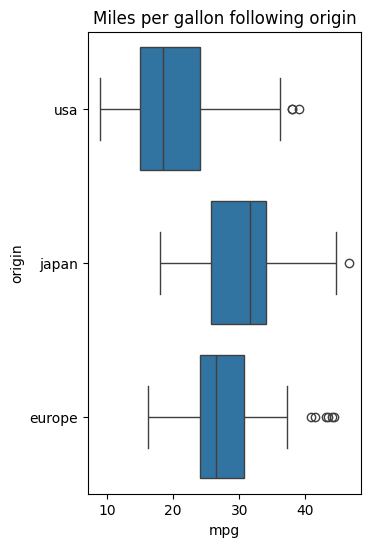

In [ ]:
# 제조국에 따른 연비 비교 _ 일본차가 연비가 좋다
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.boxplot(x = 'mpg', y = 'origin', data = mpg)
plt.title('Miles per gallon following origin')

Text(0.5, 1.0, 'Acceleration power following weight')

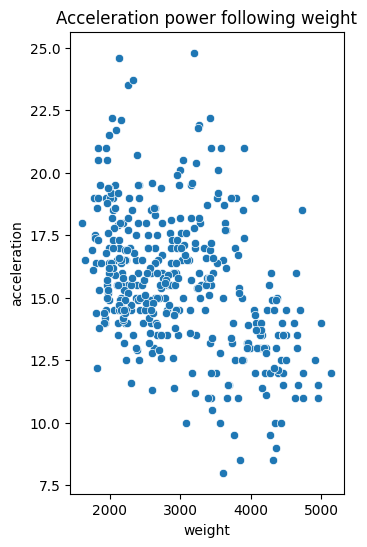

In [ ]:
# 무게에 따른 가속 시간 _ 가벼울 수록 빨리 가속한다
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.scatterplot(x = 'weight', y = 'acceleration', data = mpg)
plt.title('Acceleration power following weight')

### 공분산 및 상관계수 연산

<Axes: xlabel='horsepower', ylabel='mpg'>

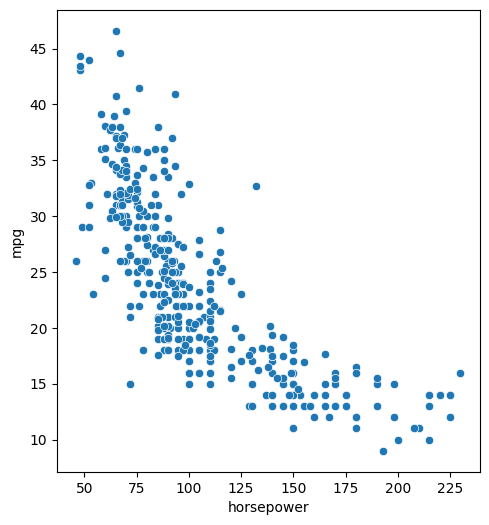

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'horsepower', y = 'mpg', data = mpg)

Text(0.5, 1.0, 'cov_matrix')

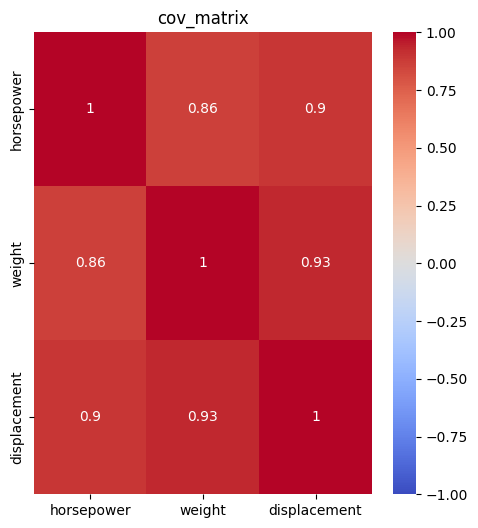

In [ ]:
cov_matrix = mpg[['displacement', 'weight', 'horsepower']]

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('cov_matrix')

## 이름별 feature 분석?

In [54]:
# name 별 대수 파악
mpg['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [55]:
#name으로 묶어 통계치 보여주기
grouped_data = mpg.groupby('name')
features = ['mpg']

summary_stats = grouped_data[features].agg(
    var=pd.NamedAgg(column='mpg', aggfunc='var'),
    std=pd.NamedAgg(column='mpg', aggfunc='std'),
    cv=pd.NamedAgg(column='mpg', aggfunc=lambda x: x.std() / x.mean() * 100),
    median=pd.NamedAgg(column='mpg', aggfunc='median'),
    average=pd.NamedAgg(column='mpg', aggfunc='mean')
)

print(summary_stats.head(10))

                                  var       std         cv  median  average
name                                                                       
amc ambassador brougham           NaN       NaN        NaN   13.00   13.000
amc ambassador dpl                NaN       NaN        NaN   15.00   15.000
amc ambassador sst                NaN       NaN        NaN   17.00   17.000
amc concord                 12.005000  3.464823  15.857315   21.85   21.850
amc concord d/l                   NaN       NaN        NaN   18.10   18.100
amc concord dl                    NaN       NaN        NaN   23.00   23.000
amc concord dl 6                  NaN       NaN        NaN   20.20   20.200
amc gremlin                  1.666667  1.290994   6.620484   19.50   19.500
amc hornet                   4.562500  2.136001  11.024521   18.50   19.375
amc hornet sportabout (sw)        NaN       NaN        NaN   18.00   18.000


In [56]:
# name이 'ford pinto'인 행들을 필터링
ford_pinto = mpg[mpg['name'] == 'ford pinto']

# name이 'toyota corolla'인 행들을 필터링
toyota_corolla = mpg[mpg['name'] == 'toyota corolla']

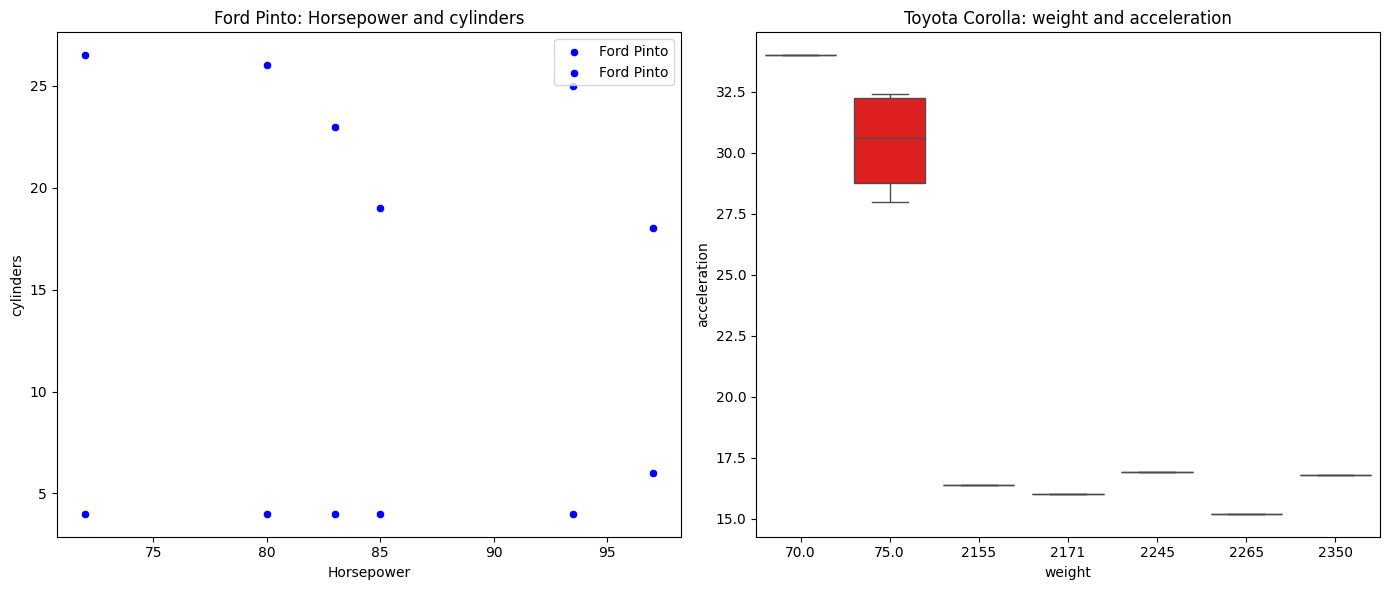

In [57]:
# 연비와 마력을 시각화하기 위해 두 개의 서브플롯을 만듭니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ford pinto의 연비와 마력 시각화 _ 산점도
sns.scatterplot(ax=axes[0], data=ford_pinto, x='horsepower', y='mpg', color='blue', label='Ford Pinto')
axes[0].set_title('Ford Pinto: Horsepower vs MPG')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('MPG')








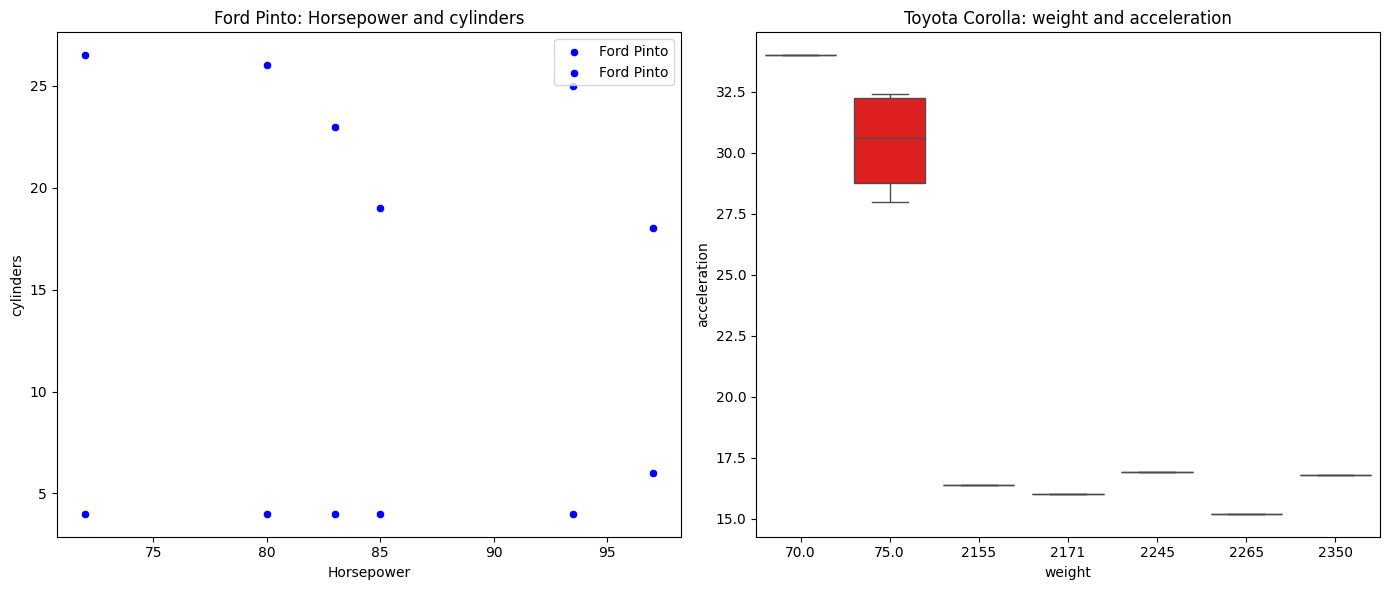

In [60]:
# 연비와 마력을 시각화하기 위해 두 개의 서브플롯을 만듭니다.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ford pinto의 연비와 마력 시각화 _ 산점도
sns.scatterplot(ax=axes[0], data=ford_pinto, x='horsepower', y='mpg', color='blue', label='Ford Pinto')
axes[0].set_title('Ford Pinto: Horsepower vs MPG')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('MPG')

# ford pinto의 마력과 실린더 시각화 _ 산점도
sns.scatterplot(ax=axes[0], data=ford_pinto, x='horsepower', y='cylinders', color='blue', label='Ford Pinto')
axes[0].set_title('Ford Pinto: Horsepower and cylinders')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('cylinders')

# toyota corolla의 연비와 마력 시각화
sns.boxplot(ax=axes[1], data=toyota_corolla, x='horsepower', y='mpg', color='red')
axes[1].set_title('Toyota Corolla: Horsepower vs MPG')
axes[1].set_xlabel('Horsepower')
axes[1].set_ylabel('MPG')

# toyota 무게와 acceleration 시각화
sns.boxplot(ax=axes[1], data=toyota_corolla, x='weight', y='acceleration', color='red')
axes[1].set_title('Toyota Corolla: weight and acceleration')
axes[1].set_xlabel('weight')
axes[1].set_ylabel('acceleration')

# 그래프 출력
plt.tight_layout()
plt.show()

In [75]:
columns_of_interest = ['mpg','cylinders','acceleration','name']
# 필요한 컬럼만 기재
data = mpg[columns_of_interest]
# name이 'ford pinto' 또는 'toyota corolla'인 행들을 필터링
filtered_data = data[data['name'].isin(['ford pinto', 'toyota corolla'])]
filtered_data

,mpg,cylinders,acceleration,name
32,25.0,4,19.0,ford pinto
112,19.0,4,18.5,ford pinto
130,26.0,4,16.5,ford pinto
167,29.0,4,16.0,toyota corolla
168,23.0,4,17.0,ford pinto
174,18.0,6,14.5,ford pinto
205,28.0,4,16.4,toyota corolla
206,26.5,4,13.6,ford pinto
321,32.2,4,15.2,toyota corolla
356,32.4,4,16.8,toyota corolla


In [76]:
variance_by_name =filtered_data.groupby('name').var()
variance_by_name

,mpg,cylinders,acceleration
name,,,
ford pinto,13.241667,0.666667,4.581667
toyota corolla,6.332000,0.000000,0.478000


<Axes: xlabel='name'>

<Figure size 1200x600 with 0 Axes>

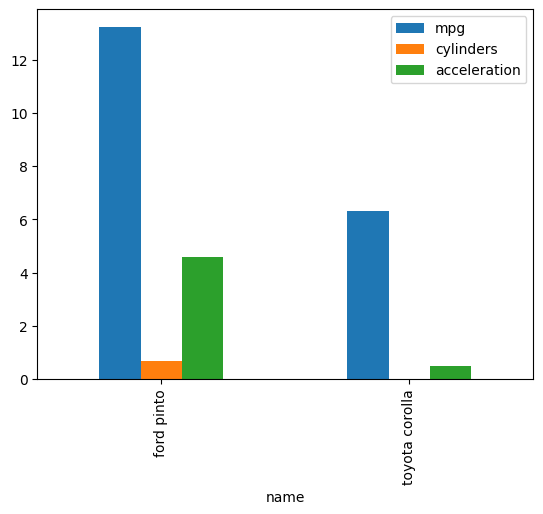

In [77]:
#분산
plt.figure(figsize=(12,6))
variance_by_name.plot(kind='bar')

In [78]:
#평균
mean_by_name =filtered_data.groupby('name').mean()
mean_by_name

,mpg,cylinders,acceleration
name,,,
ford pinto,22.916667,4.333333,16.516667
toyota corolla,31.120000,4.000000,16.260000


<Axes: xlabel='name'>

<Figure size 1200x600 with 0 Axes>

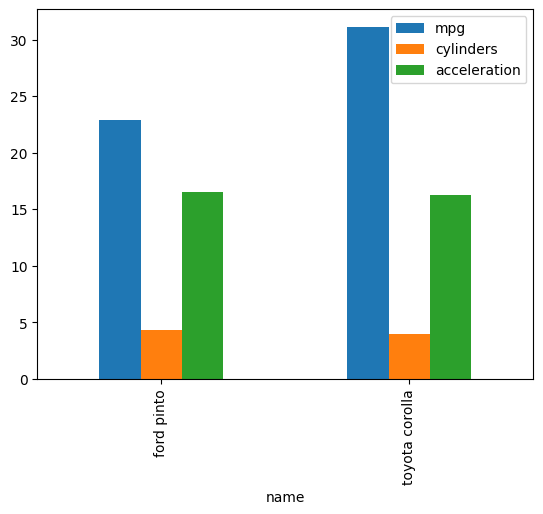

In [80]:
# 평균 시각화
plt.figure(figsize=(12,6))
mean_by_name.plot(kind='bar')

In [79]:
#중위
median_by_name =filtered_data.groupby('name').median()
median_by_name

,mpg,cylinders,acceleration
name,,,
ford pinto,24.0,4.0,16.75
toyota corolla,32.2,4.0,16.40
